In [1]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import FashionMNIST
from matplotlib import pyplot as plt

In [2]:
# Convert vector to image
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.view(x.size(0), 28, 28)
    return x

In [3]:
bs = 1000

transform = transforms.Compose([transforms.ToTensor()])

traindataset = FashionMNIST('./data', download=True, train=True, transform=transform)
testdataset = FashionMNIST('./data', download=True, train=False, transform=transform)

# Loaders
trainloader = torch.utils.data.DataLoader(traindataset, batch_size=bs, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testdataset, batch_size=bs, shuffle=False, num_workers=4)

In [4]:
# Displaying routine
def display_images(in_, out, n=1):
    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data)
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')

### fully connected auto-encoder 

In [5]:
class Fully_AutoEncoder(nn.Module):
    def __init__(self):
        super(Fully_AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
        nn.Linear(28*28, 100),
        nn.ReLU())
        
        self.decoder = nn.Sequential(
        nn.Linear(100, 28*28),
        nn.ReLU())
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [6]:
model_f_ae = Fully_AutoEncoder()

In [8]:
# Configure the optimiszer and criterion
learning_rate = 1e-3

optimizer = torch.optim.Adam(model_f_ae.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

epoch [1/20], loss:0.0439
epoch [2/20], loss:0.0318
epoch [3/20], loss:0.0264
epoch [4/20], loss:0.0238
epoch [5/20], loss:0.0217
epoch [6/20], loss:0.0203
epoch [7/20], loss:0.0201
epoch [8/20], loss:0.0192
epoch [9/20], loss:0.0185
epoch [10/20], loss:0.0180
epoch [11/20], loss:0.0173
epoch [12/20], loss:0.0172
epoch [13/20], loss:0.0170
epoch [14/20], loss:0.0172
epoch [15/20], loss:0.0163
epoch [16/20], loss:0.0158
epoch [17/20], loss:0.0159
epoch [18/20], loss:0.0156
epoch [19/20], loss:0.0153
epoch [20/20], loss:0.0158


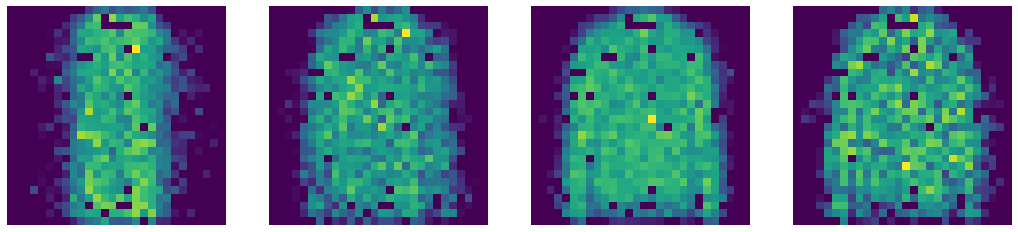

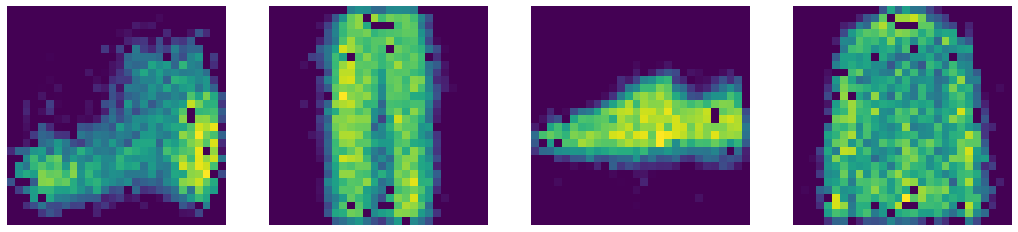

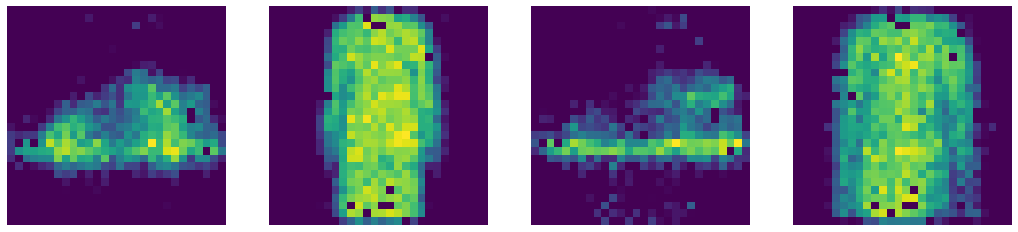

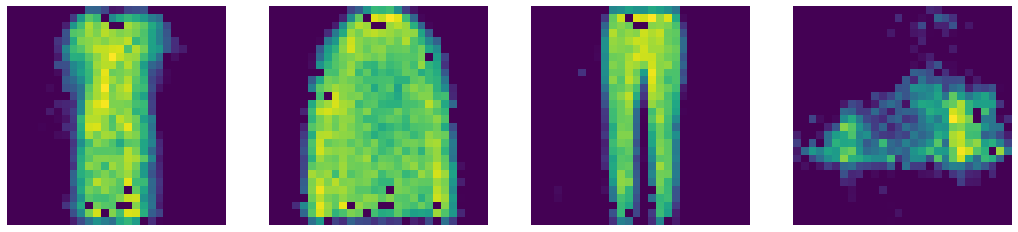

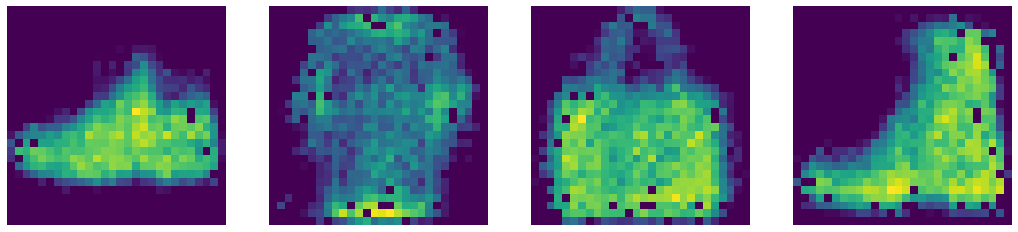

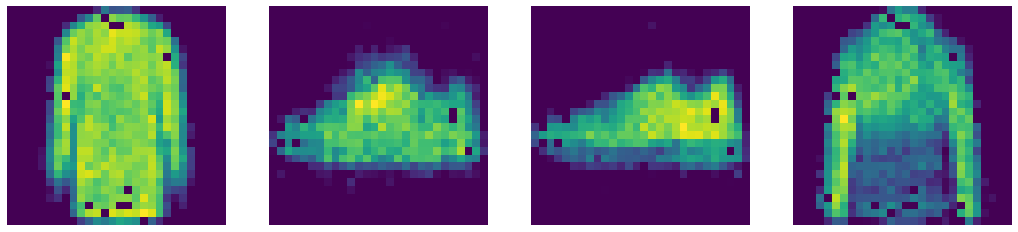

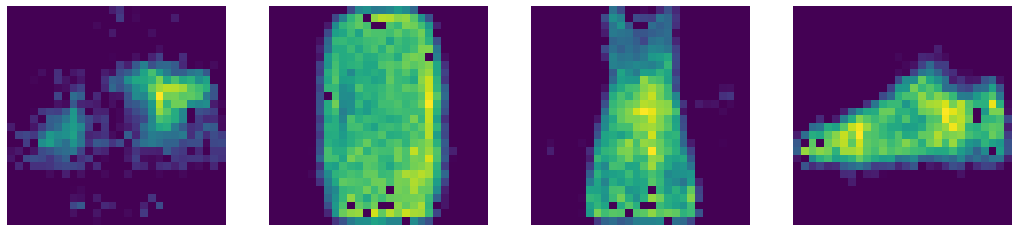

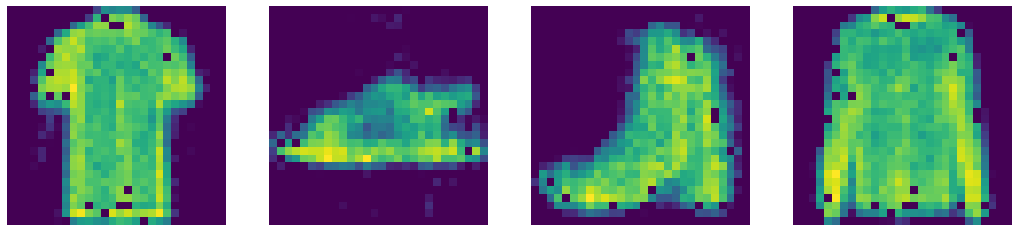

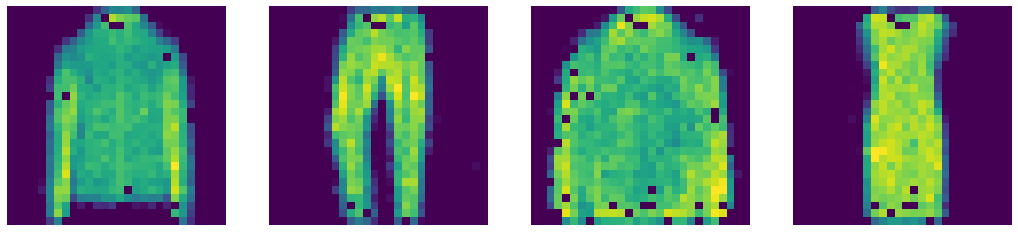

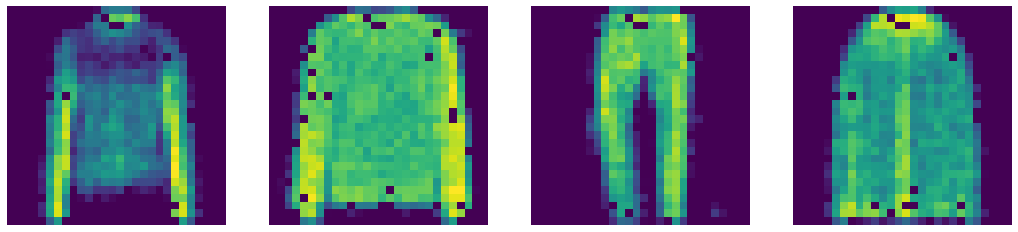

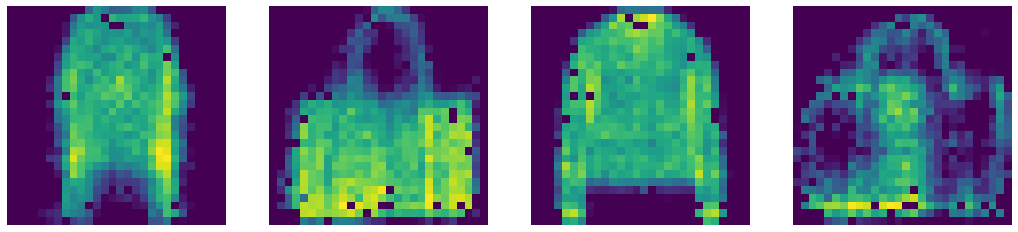

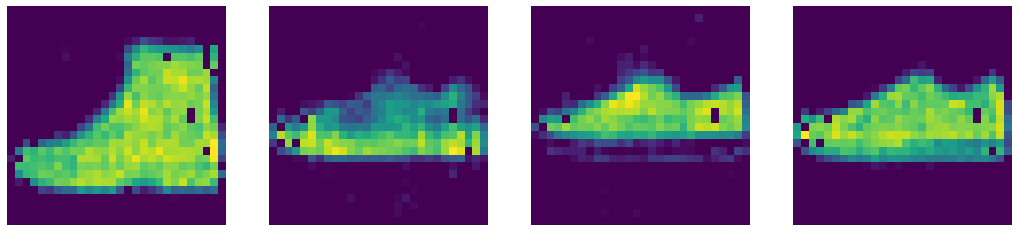

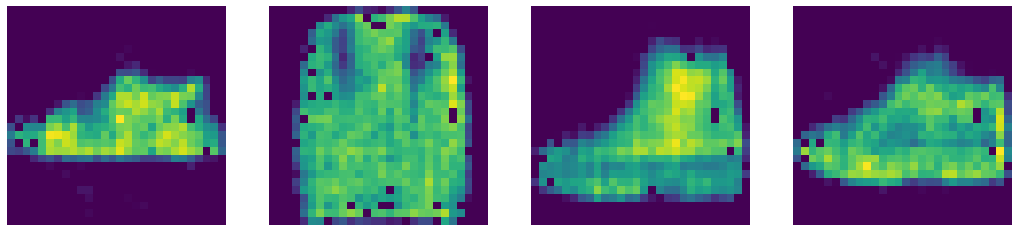

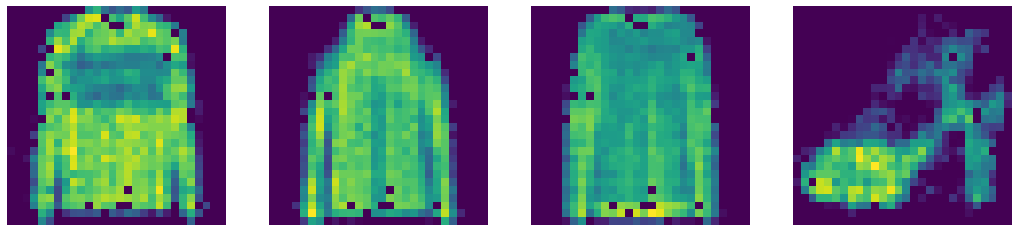

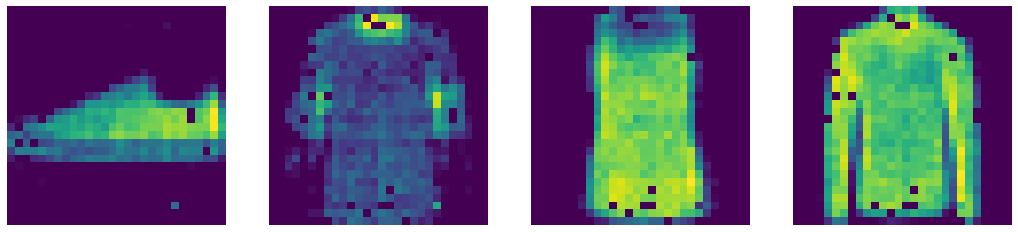

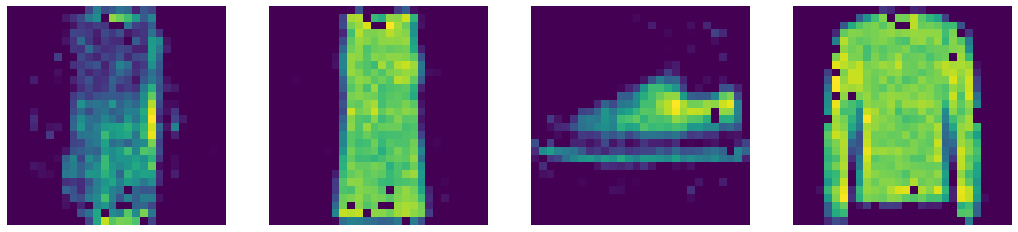

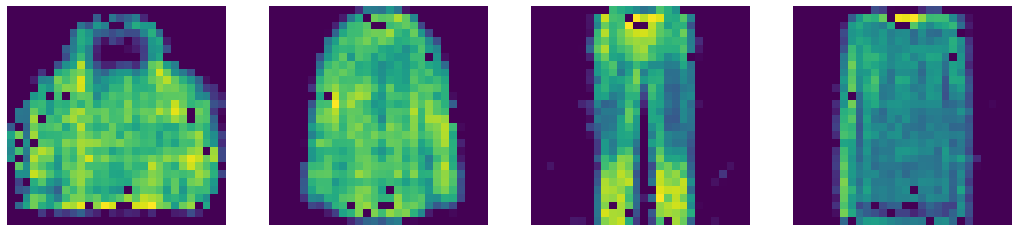

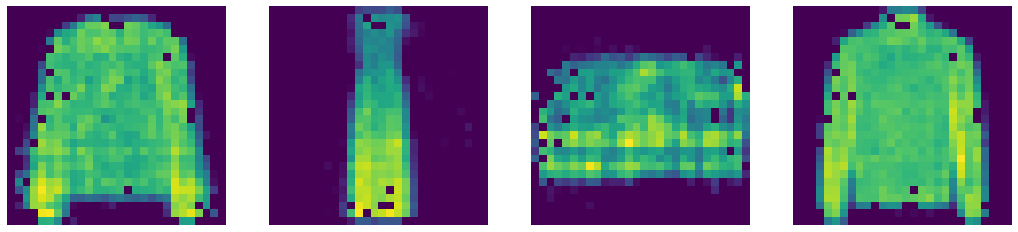

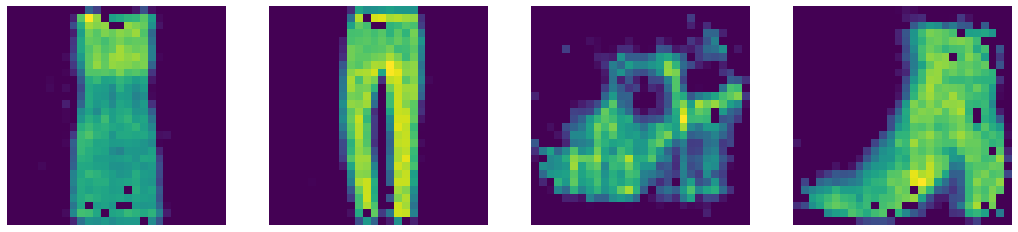

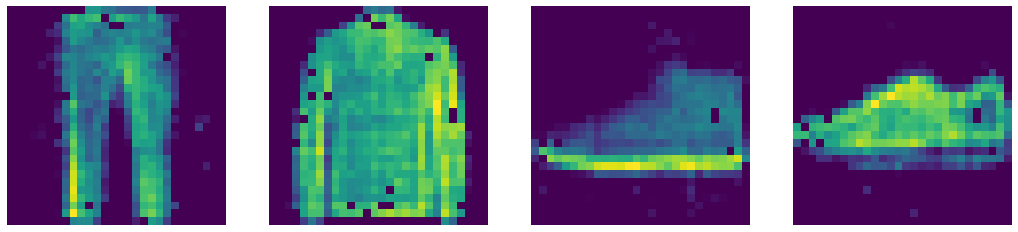

In [9]:
num_epochs = 20

for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        img.requires_grad_()
        img = img.view(img.size(0), -1)
        output = model_f_ae(img)  
        loss = criterion(output, img.data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)

In [48]:
from torch.autograd import Variable
plt.style.use('default')
%matplotlib inline 

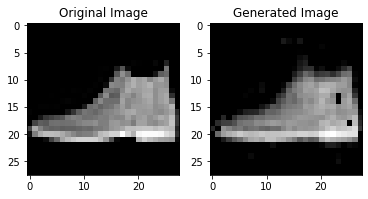

In [49]:
test_images, labels = next(iter(testloader))

test_images = Variable(test_images.view(test_images.size()[0], -1))
test_output = model_f_ae(test_images)
  
inp = test_images.view(-1, 28, 28)
out = test_output.view(-1, 28, 28)

fig = plt.figure()
plot = fig.add_subplot(1, 2, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[0].cpu(), cmap='gray')

plot = fig.add_subplot(1, 2, 2)
plot.set_title('Generated Image')
imgplot = plt.imshow(out[0].cpu().detach(), cmap='gray')
plt.show()

In [43]:
import torch.nn as nn
import torch.nn.functional as F
class CNN_AutoEncoder(nn.Module):
    def __init__(self):
        super(CNN_AutoEncoder, self).__init__()
        
        
        
        
        ## encoder layers ##
        # conv layer (depth from 1 --> 16), 3x3 kernels
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)  
        # conv layer (depth from 16 --> 4), 3x3 kernels
        self.conv2 = nn.Conv2d(16, 4, 3, padding=1)
        # pooling layer to reduce x-y dims by two; kernel and stride of 2
        self.pool = nn.MaxPool2d(2, 2)
        
        ## decoder layers ##
        ## a kernel of 2 and a stride of 2 will increase the spatial dims by 2
        self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(16, 1, 2, stride=2)
#         self.encoder = nn.Sequential(
#             nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 3, stride = 3, padding = 1),
#             nn.LeakyReLU(),
#             #nn.ReLU(),
#             nn.AvgPool2d(kernel_size = 2, stride = 2),  
#             nn.Conv2d(in_channels = 16, out_channels = 8, kernel_size = 3, stride = 2, padding = 1),
#             nn.LeakyReLU(),
#             #nn.ReLU(),
#             nn.AvgPool2d(kernel_size = 2, stride = 1) ) 
        
#         self.decoder = nn.Sequential(
#             nn.ConvTranspose2d(in_channels = 8, out_channels =16, kernel_size = 3, stride = 2, padding = 0),
#             nn.LeakyReLU(),
#             #nn.ReLU(),
#             nn.ConvTranspose2d(in_channels = 16, out_channels = 8, kernel_size = 5, stride = 3, padding = 1),
#             nn.LeakyReLU(),
#             #nn.ReLU(),
#             nn.ConvTranspose2d(in_channels = 8, out_channels = 1, kernel_size = 2, stride = 2, padding = 1),
#             nn.Tanh()
            
        #)
        
    def forward(self, x):
        
        ## encode ##
        # add hidden layers with relu activation function
        # and maxpooling after
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        # add second hidden layer
        x = F.relu(self.conv2(x))
        x = self.pool(x)  # compressed representation
        
        ## decode ##
        # add transpose conv layers, with relu activation function
        x = F.relu(self.t_conv1(x))
        # output layer (with sigmoid for scaling from 0 to 1)
        x = F.sigmoid(self.t_conv2(x))
#         x = self.encoder(x)
#         x = self.decoder(x)
        return x

In [44]:
model_cnn_ae = CNN_AutoEncoder()

In [45]:
# Configure the optimiszer and criterion
learning_rate = 1e-3

optimizer = torch.optim.Adam(model_cnn_ae.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

/home/aimsd/.local/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch [1/10], loss:0.1053
epoch [2/10], loss:0.0403
epoch [3/10], loss:0.0325
epoch [4/10], loss:0.0284
epoch [5/10], loss:0.0274
epoch [6/10], loss:0.0265
epoch [7/10], loss:0.0256
epoch [8/10], loss:0.0252
epoch [9/10], loss:0.0245
epoch [10/10], loss:0.0247


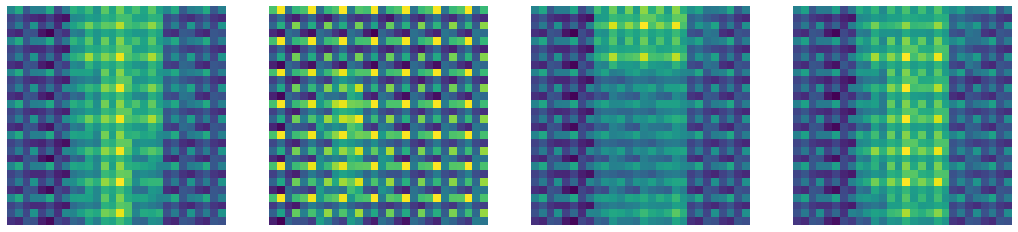

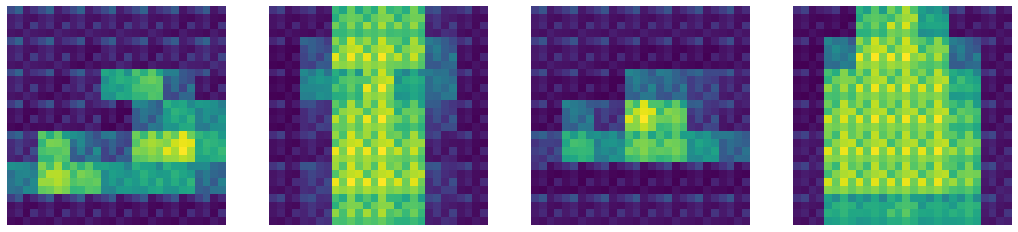

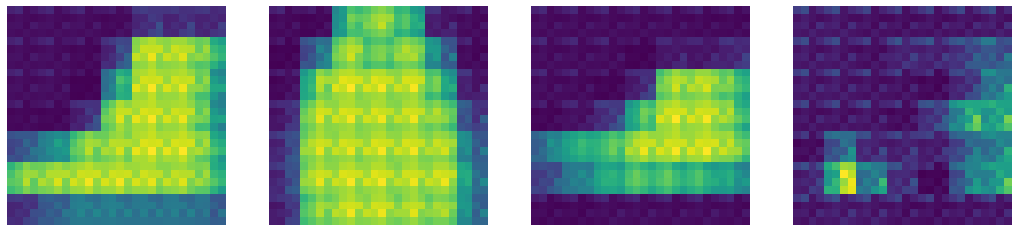

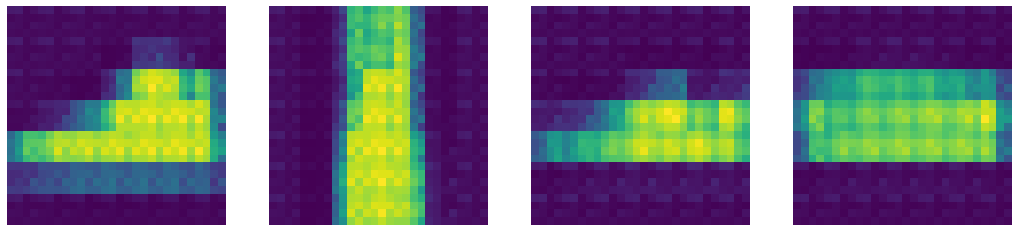

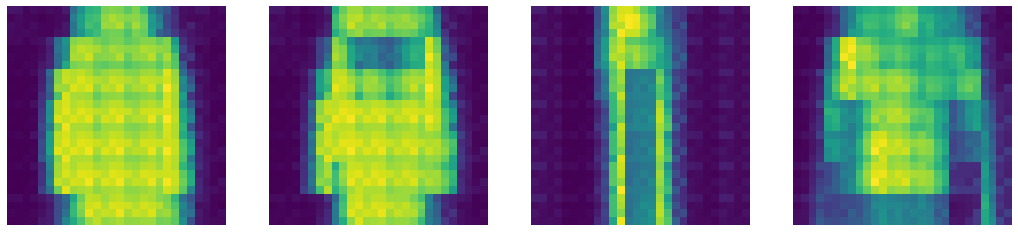

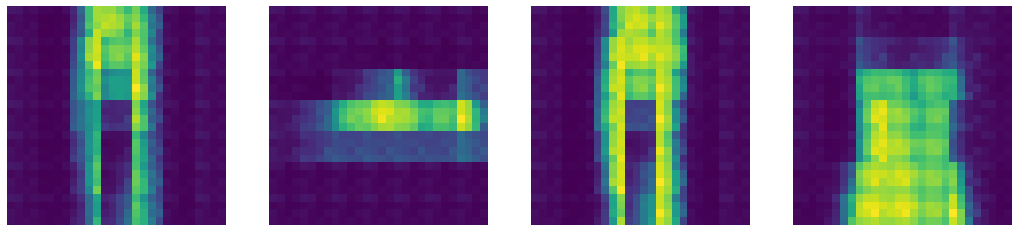

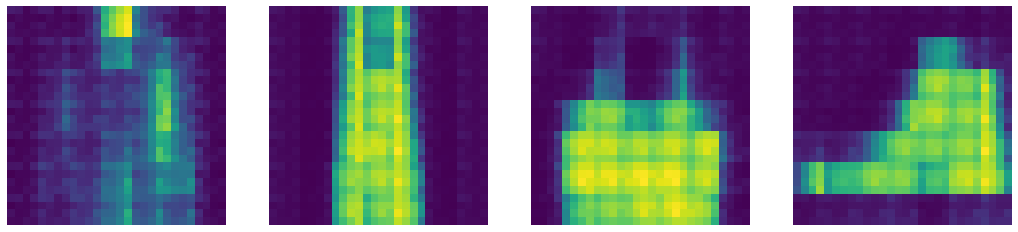

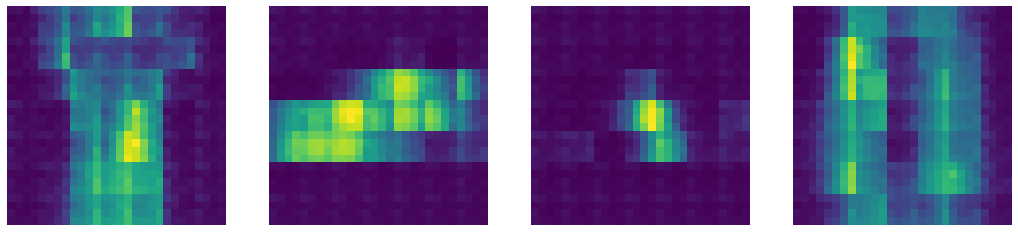

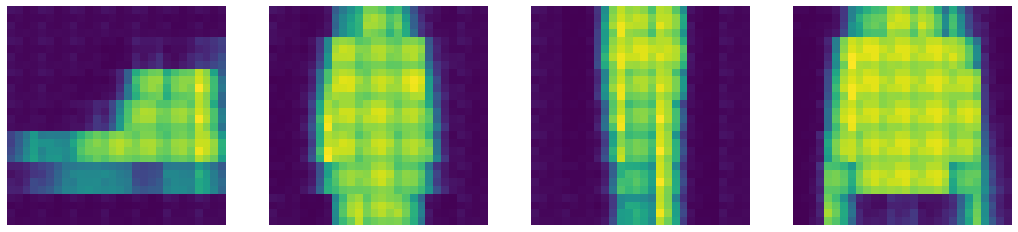

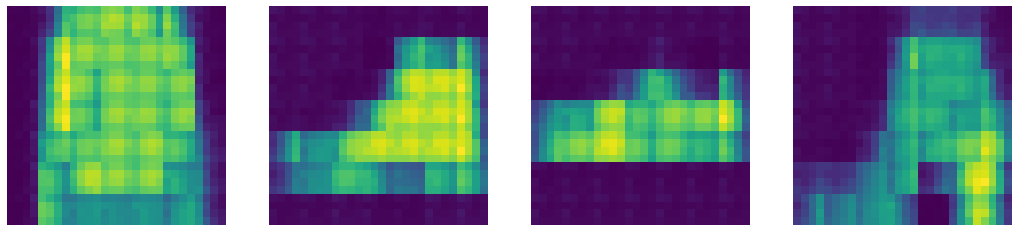

In [46]:
num_epochs = 10

for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        #img.requires_grad_()
        #img = img.view(img.size(0), -1)
        output = model_cnn_ae(img)  
        loss = criterion(output, img.data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)

In [47]:
from torch.autograd import Variable
plt.style.use('default')
%matplotlib inline 

/home/aimsd/.local/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


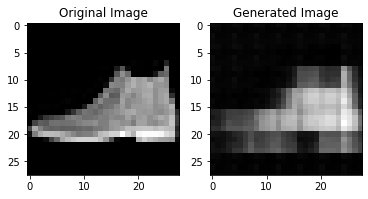

In [48]:
test_images, labels = next(iter(testloader))
#test_images = Variable(test_images.view(test_images.size()[0], -1))
test_output = model_cnn_ae(test_images)
  
inp = test_images.view(-1, 28, 28)
out = test_output.view(-1, 28, 28)

fig = plt.figure()
plot = fig.add_subplot(1, 2, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[0].cpu(), cmap='gray')

plot = fig.add_subplot(1, 2, 2)
plot.set_title('Generated Image')
imgplot = plt.imshow(out[0].cpu().detach(), cmap='gray')
plt.show()

### performance of using the fully connected auto-encoder to the CNN_Autoencoder

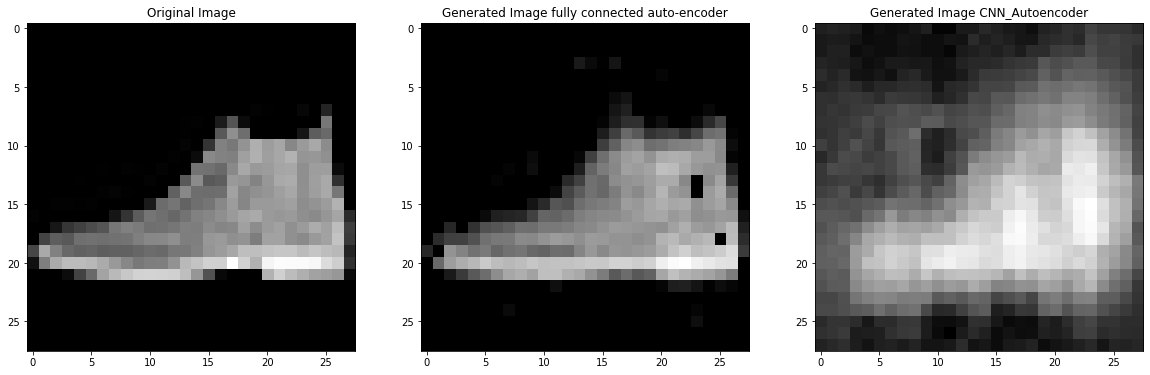

In [74]:
test_images, labels = next(iter(testloader))
#test_images = Variable(test_images.view(test_images.size()[0], -1))

test_image = Variable(test_images.view(test_images.size()[0], -1))
#test_output = model_f_ae(test_images)

test_outputfully = model_f_ae(test_image)
test_outputcnn = model_cnn_ae(test_images)
  
inp = test_images.view(-1, 28, 28)
outf = test_outputfully.view(-1, 28, 28)
outcnn = test_outputcnn.view(-1, 28, 28)

fig = plt.figure(figsize=(20,20))
plot = fig.add_subplot(1, 3, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[0].cpu(), cmap='gray')

plot = fig.add_subplot(1, 3, 2)
plot.set_title('Generated Image fully connected auto-encoder')
imgplot = plt.imshow(outf[0].cpu().detach(), cmap='gray')

plot = fig.add_subplot(1, 3, 3)
plot.set_title('Generated Image CNN_Autoencoder')
imgplot = plt.imshow(outcnn[0].cpu().detach(), cmap='gray')
plt.show()

##### Observing the images above, we notice that the image generated by a fully connected autoencoder has patches but is much clear than the image generated by the CNN_autoencoder

#### CNN_autoencoder do not have patches but is much more blurry. This is due to the size of the image and the number of conv transpose we use in the decoder.


#### But we can conclude that the CNN_autoencoder learn better feature than the fully connected autoencoder.

### Also if we train the CNN_autoencoder for longer it will perform better

# Exercises

Your exercise should you choose to accept, is to 

1. change the model class to use Convolution Layers and re-run with the same training code in cells below.
2. Edit the code above for denoising autoencoder? (bonus point if your code it)
3. Briefly describe the performance of using the fully connected auto-encoder to the CNN_Autoencoder

Deadline: Today: 2:pm